In [ ]:
from findmycells.main import P

In [5]:
import pandas as pd
import numpy as np
from skimage.io import imsave, imread

from pathlib import Path
import os

In [6]:
df_single_plane_filepaths = pd.read_excel('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner_fmc/#11_SN_slice1.xlsx')

In [15]:
single_plane_image_filepath = Path(df_single_plane_filepaths['plane_filepath'].iloc[1])

In [16]:
single_plane_image2 = imread(single_plane_image_filepath)

In [17]:
single_plane_image2.shape

(10976, 7840, 3)

In [21]:
zstack = np.stack([single_plane_image, single_plane_image2])

In [22]:
zstack.shape

(2, 10976, 7840, 3)

In [13]:
single_plane_image.shape

(10976, 7840, 3)

In [23]:
single_plane_images = []
for row_index in range(df_single_plane_filepaths.shape[0]):
    single_plane_image_filepath = df_single_plane_filepaths['plane_filepath'].iloc[row_index]
    single_plane_images.append(imread(single_plane_image_filepath))
zstack = np.stack(single_plane_images)

In [24]:
zstack.shape

(13, 10976, 7840, 3)

In [ ]:
'/mnt/d/new_analysis_data_set_EV_A53T/Mosaik_images_for_training_and_analyis/analysis/#2_2_SN_slice1/Plane000.tif'

In [ ]:
create_

In [2]:
path = Path('/mnt/d/new_analysis_data_set_EV_A53T/Mosaik_images_for_training_and_analyis/analysis/#21_2_SN_slice3/')

In [6]:
all_subdirs = [path]

In [11]:
root_dir_path = Path('/mnt/d/new_analysis_data_set_EV_A53T/Mosaik_images_for_training_and_analyis/analysis/')
destination_path = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner_fmc/')

#batch_create_excel_files_as_image_loader(root_dir_path = root_dir_path, destination_path = destination_path)

In [12]:
preparator = CreateExcelFilesForImageLoader(root = root_dir_path, destination = destination_path, batch_processing = True)

ValueError: The plane ids as inferred from the filenames in /mnt/d/new_analysis_data_set_EV_A53T/Mosaik_images_for_training_and_analyis/analysis/#2_2_SN_slice1 are not consecutive!

In [30]:
destination_path = Path(os.getcwd())

In [34]:
path.is_dir()

True

In [10]:
import os
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import roifile
from pathlib import Path
from typing import Dict, Tuple, List


import shutil
from skimage.io import imsave, imread
from skimage import draw

In [3]:
training_data_root_dir = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/')


In [7]:
SUBDIR_IDENTIFIERS = {'expert_roi_sets': ['roi_sets', 'rois', 'ROIs', 'ROIsets'],
                      'images': ['images', 'Images'],
                      'expert_masks': ['masks', 'Masks']}

In [9]:
for subdir_type, identifiers in SUBDIR_IDENTIFIERS.items():
    print(identifiers)

['roi_sets', 'rois', 'ROIs', 'ROIsets']
['images', 'Images']
['masks', 'Masks']


In [ ]:
def identify_directories(paths: Dict, subdir: Path) -> Dict:
    for subdir_type, identifiers in SUBDIR_IDENTIFIERS.items():
        for identifier in identifiers:
            if identifier in subdir.name:
                paths[subdir_type] = subdir
                return paths

def rename_experts_and_create_mask_subdirs(metadata: Dict, paths: Dict) -> Dict:
    for expert_subdir in paths['expert_roi_sets'].iterdir():
        original_expert_name = expert_subdir.name
        assigned_expert_name = f'expert_{metadata['total_expert_count'] + 1}'
        metadata[f'n_rois_{assigned_expert_name}({original_expert_name})']
        expert_mask_dir = paths['expert_masks'].joinpath(assigned_expert_name)
        if expert_mask_dir.is_dir() == False:
            expert_mask_dir.mkdir()
    return metadata


def create_mask_from_expert_roi_set(full_image_filename: str, image_shape: Tuple[int, int], path_to_roi_sets: Path) -> Tuple[np.ndarray, int]:
    mask = np.zeros(image_shape, 'uint8')
    partial_image_filename = full_image_filename[:full_image_filename.find('.')]
    matching_roi_sets_filepath = None
    for roi_sets_filename in path_to_expert_roi_sets.iterdir():
        if full_image_filename in roi_sets_filename.name:
            matching_roi_sets_filepath = roi_sets_filename
        elif partial_image_filename in roi_sets_filename.name:
            matching_roi_sets_filepath = roi_sets_filename
    if matching_roi_sets_filepath != None:
        if matching_roi_sets_filepath.name.endswith('.zip'):
            all_rois = roifile.ImagejRoi.fromfile(matching_roi_sets_filepath)
        else:
            all_rois = [roifile.ImagejRoi.fromfile(matching_roi_sets_filepath)]
        for roi in all_rois:
            row_coords, col_coords = draw.polygon(roi.coordinates()[:,1], roi.coordinates()[:,0], mask.shape)
            mask[row_coords, col_coords] = 255
        n_rois = len(all_rois)
    if matching_roi_sets_filepath == None:
        n_rois = 0
    return mask, n_rois


def create_training_dataset(paths: Dict, starting_file_id: int=0):
    file_id = starting_file_id
    image_renaming = {'original_image_filename': list(),
                      'assigned_file_id': list()}
    for image_filepath in paths['images'].iterdir():
        image_renaming['original_image_filename'].append(image_filepath.name)
        image_renaming['assigned_file_id'].append(str(file_id).zfill(4))
        image = imread(image_filepath)
        image_shape = (image.shape[0], image.shape[1])
        del image
        for expert_specific_roi_sets_subdir in paths['expert_roi_sets'].iterdir():
            mask, n_rois = create_mask_from_roi_set(full_image_filename = image_filepath.name, image_shape = image_shape, path_to_roi_sets = expert_specific_roi_sets_subdir)
            assigned_expert_name = path_to_expert_roi_sets.name
            mask_filename = f'{str(file_id).zfill(4)}_mask.png'
            mask_filepath = paths['expert_masks'].joinpath(expert_name, mask_filename)
            imsave(mask_filepath, mask, check_contrast=False)
        file_id += 1
        
            
            
    expert_renaming = {'original_expert_name': list(),
                       'assigned_expert_name': list()}
            



In [5]:
paths = {'expert_roi_sets': None,
         'images': None,
         'expert_masks': None}

train_dataset_metadata = {'assigned_file_id': list(),
                          'original_image_filename': list(),
                          'total_expert_count': 0}

for subdir in training_data_root_dir.iterdir():
    if subdir.is_dir():
        paths = identify_directories(paths = paths, subdir = subdir)

if (paths['expert_roi_sets'] != None) & (paths['images'] != None):
    if paths['expert_masks'] == None:
        paths['expert_masks'] = training_data_root_dir.joinpath('expert_masks')
        paths['expert_masks'].mkdir()
    train_dataset_metadata = rename_experts_and_create_mask_subdirs(metadata = train_dataset_metadata, paths = paths)
    


    

    
    
        
else:
    raise ValueError('The training dataset root directory does not contain the obligatory "images" and "expert_roi_sets" directories!')
        

/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/2022_03_23_copy_from_louisa
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images_renamed
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/masks


In [2]:
expert_roi_sets_root_path = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/')
images_path = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images/')
mask_out_path = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/masks/')

In [3]:
for expert_subdir in expert_roi_sets_root_path.iterdir():
    expert_name = expert_subdir.name
    expert_masks_path = mask_out_path.joinpath(expert_name)
    expert_masks_path.mkdir()

In [12]:
images_path.as_posix()

'/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images'

In [ ]:
for 

In [13]:
source = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images/#17_SN_slice1_1.png')


shutil.copy(source, destination)

'/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images_renamed/#17_SN_slice1_1.png'

In [14]:
destination = Path('/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images_renamed')
for image_filepath in images_path.iterdir():
    shutil.copy(image_filepath, destination)
  
    

OSError: [Errno 18] Invalid cross-device link: '/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images_renamed/#17_SN_slice1_1.png' -> '0000.png'

In [15]:
file_id = 0
for image_new_path in destination.iterdir():
    new_filename = f'{str(file_id).zfill(4)}.png'
    image_new_path.rename(destination.joinpath(new_filename))
    file_id += 1

In [10]:
file_id = 0
for image_filepath in images_path.iterdir():
    image = imread(image_filepath)
    image_shape = (image.shape[0], image.shape[1])
    del image
    for path_to_expert_roi_sets in expert_roi_sets_root_path.iterdir():
        mask = create_mask_from_expert_roi_set(full_image_filename = image_filepath.name, image_shape = image_shape, path_to_expert_roi_sets = path_to_expert_roi_sets)
        expert_name = path_to_expert_roi_sets.name
        mask_filename = f'{str(file_id).zfill(4)}_mask.png'
        mask_filepath = mask_out_path.joinpath(expert_name, mask_filename)
        imsave(mask_filepath, mask, check_contrast=False)
    file_id += 1
        
        

/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: /mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/masks/Alex/0000_mask.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: /mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/masks/JingJing/0000_mask.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: /mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/masks/Judith/0000_mask.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: /

In [66]:
file_id = 0
str(file_id).zfill(4)

'0000'

In [62]:
for image_filepath in images_path.iterdir():
    full_image_filename = image_filepath.name
    for 
    
    partial_image_filename = full_image_filename[:full_image_filename.find('.')]
    

#17_SN_slice1_1
#17_SN_slice1_2
#17_SN_slice2_1
#17_SN_slice2_2
#17_SN_slice3_1
#17_SN_slice3_2
#17_SN_slice4_1
#17_SN_slice4_2
#17_SN_slice5_1
#17_SN_slice5_2
#17_SN_slice6_1
#17_SN_slice6_2_replaced
#9_2_SN_slice1_1
#9_2_SN_slice1_2
#9_2_SN_slice2_1
#9_2_SN_slice2_2
#9_2_SN_slice3_1
#9_2_SN_slice3_2
#9_2_SN_slice4_1
#9_2_SN_slice4_2
#9_2_SN_slice5_1
#9_2_SN_slice5_2
#9_2_SN_slice6_1
#9_2_SN_slice6_2


In [58]:
for expert_roi_sets_path in roi_sets_root_path.iterdir():
    

/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/Alex
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/JingJing
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/Judith
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/louisa_nochunvollständig
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/Sawako
/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/expert_roi_sets/Tobi


In [36]:
img_path = '/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/images/#17_SN_slice1_1.png'

In [39]:
image = imread(img_path)

(8400, 6128, 3)

In [26]:
filepath = '/mnt/c/Users/dsege/TEMP/Grotemeyer/02_all_new_scanner/training_dataset_creation/roi_sets/Alex/#17_SN_slice1_1.png.zip'

In [27]:
all_rois = roifile.ImagejRoi.fromfile(filepath)

In [50]:
mask = np.zeros((image.shape[0], image.shape[1]), 'uint8')
for roi in all_rois:
    row_coords, col_coords = draw.polygon(roi.coordinates()[:,1], roi.coordinates()[:,0], mask.shape)
    mask[row_coords, col_coords] = 255
    
    

In [51]:
imsave('test_mask.png', mask)

/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: test_mask.png is a low contrast image
  """Entry point for launching an IPython kernel.


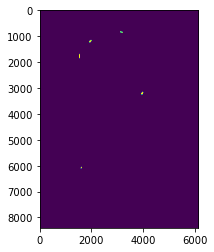

In [49]:
plt.imshow(mask)

In [25]:
rois[0].coordinates()[:,1]

array([1262, 1230, 1190, 1158, 1158, 1176, 1222, 1254])

In [17]:
from skimage import draw

img = np.zeros((2000, 2000), 'uint8')
rr, cc = draw.polygon(vertices[:,0], vertices[:,1], img.shape)
img[rr,cc] = 1

In [24]:
draw.polygon(vertices[:,0], vertices[:,1], img.shape)

(array([1900, 1901, 1901, ..., 1989, 1989, 1990]),
 array([1222, 1218, 1219, ..., 1165, 1166, 1158]))

In [20]:
import matplotlib.pyplot as plt

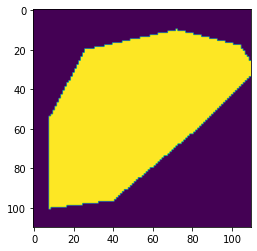

In [23]:
plt.imshow(img[1890:2000, 1150:1260])

Next steps:

 - ~load ROIs~ (or create one with shape of the image)
 - ~make adaptations to database:~
   - ~use Path objects to enable continous integration~
   - ~rename deepflash2_dir to segmentation_tool_dir~
   - ~create sorted list of all preprocessing steps (i.e. preprocessing strategies)~
 - ~adapt main~
 - ~function that saves preprocessed images~
 
 
 - confirm that roi is loaded and adjusted correctly (rows and columns switched?)
 - continue with segmentations

 - Minimal preprocessing steps are:
    - save the "unprocessed" microscopy images to the preprocessed_dir
    - load the unprocessed ROIs into the database (create ROI with shape of image if whole image is to be analyzed)

In [ ]:
import random

In [ ]:
animals = ['hund', 'katze', 'maus', 'vogel', 'maulwurf']

In [ ]:
animals.remove('hund')

In [ ]:
animals

In [ ]:
random.sample(animals, 2)

In [ ]:
batch_size = 2

In [ ]:
if len(animals) % batch_size == 0:
    total_batches = int(len(animals) / batch_size)
else:
    total_batches = int(len(animals) / batch_size) + 1
file_ids_per_batch = list()
for batch_id in range(total_batches):
    if len(animals) >= batch_size:
        sampled_file_ids = random.sample(animals, batch_size)
    else:
        sampled_file_ids = animals.copy()
    file_ids_per_batch.append(sampled_file_ids)
    for elem in sampled_file_ids:
        animals.remove(elem)
return file_ids_per_batch    

In [ ]:
file_ids_per_batch

In [ ]:
import numpy as np
max(np.asarray([0, 1, 3, False, False]))

In [1]:
from findmycells.main import Project
from pathlib import Path

In [2]:
user_input_via_gui = {'project_root_dir': project_root_dir,
                      'only_duplication': True}

In [3]:
project_root_dir = Path('/mnt/c/Users/dsege/TEMP/test_project_multiple_rois/')

In [4]:
quantification_configs = {'segmentations_to_use': 'instance',
                          'postprocessing_strategies': [ReconstructCellsIn3DFrom2DInstanceLabels, ApplyExclusionCriteria],
                          'quantification_strategies': [CountFeaturesInWholeAreaROIs]}

In [5]:
user_input_via_gui = {'project_root_dir': project_root_dir, 
                      'preprocessing_strategies': [ConvertTo8Bit, CropToROIsBoundingBox, CropStitchingArtefactsRGB], 
                      'segmentation_strategies': [Deepflash2SemanticAndInstanceSegmentation], 
                      'quantification_configs': quantification_configs,
                      'inspection_strategies': [InspectReconstructedCells2D],
                      'clear_tmp_zarrs': True}

In [6]:
refactored_project = Project(user_input_via_gui)

In [7]:
refactored_project.load_status()

In [8]:
refactored_project.database.quantification_results

{'CountFeaturesInWholeAreaROIs': {'0000': {'SN': 49, 'VTA': 20},
  '0001': {'SN': 12, 'VTA': 1},
  '0002': {'SN': 42, 'VTA': 2},
  '0003': {'SN': 76, 'VTA': 2}}}

In [ ]:
refactored_project.inspect(file_ids = ['0000'], area_roi_ids = ['SN'], label_indices = [12, 15, 29])

In [13]:
list(refactored_project.database.quantification_results.keys())[0]

'CountFeaturesInWholeAreaROIs'

In [10]:
refactored_project.database.file_infos

{'file_id': ['0000', '0001', '0002', '0003'],
 'original_file_id': ['#5_SN_tg_s2_sfr1',
  '#8_SN_tg_s2_sfr1',
  '#7_SN_wt_s2_sfr1',
  '#9_SN_wt_s2_sfr1'],
 'group_id': ['tg', 'tg', 'wt', 'wt'],
 'subject_id': ['#5_tg_old', '#8_tg_old', '#7_wt_old', '#9_wt_old'],
 'microscopy_filepath': [PosixPath('/mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/00_microscopy_images/tg/#5_tg_old/#5_SN_tg_s2_sfr1.czi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/00_microscopy_images/tg/#8_tg_old/#8_SN_tg_s2_sfr1.czi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/00_microscopy_images/wt/#7_wt_old/#7_SN_wt_s2_sfr1.czi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/00_microscopy_images/wt/#9_wt_old/#9_SN_wt_s2_sfr1.czi')],
 'microscopy_filetype': ['.czi', '.czi', '.czi', '.czi'],
 'rois_present': [True, True, True, True],
 'rois_filepath': [PosixPath('/mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/01_rois_to_analyze/tg/#5_tg_

In [7]:
refactored_project.preprocess()

In [8]:
refactored_project.segment(batch_size = 2)

Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Computing Stats...
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']


Predicting 0000-000.png


Predicting 0000-001.png


Predicting 0000-002.png


Predicting 0000-003.png


Predicting 0000-004.png


Predicting 0000-005.png


Predicting 0000-006.png


Predicting 0000-007.png


Predicting 0002-000.png


Predicting 0002-001.png


Predicting 0002-002.png


Predicting 0002-003.png


Predicting 0002-004.png


Predicting 0002-005.png


Predicting 0002-006.png


Predicting 0002-007.png


2022-02-22 19:35:09,889 [INFO] WRITING LOG OUTPUT TO /home/ds/.cellpose/run.log
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 53
2022-02-22 19:35:17,656 [INFO] ** TORCH CUDA version installed and working. **
2022-02-22 19:35:17,657 [INFO] >>>> using GPU
2022-02-22 19:35:17,858 [INFO] ~~~ FINDING MASKS ~~~
2022-02-22 19:35:40,930 [INFO] >>>> TOTAL TIME 23.07 sec
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 53
2022-02-22 19:35:44,672 [INFO] ** TORCH CUDA version installed and working. **
2022-02-22 19:35:44,673 [INFO] >>>> using GPU
2022-02-22 19:35:44,803 [INFO] ~~~ FINDING MASKS ~~~
2022-02-22 19:36:

Predicting 0001-000.png


Predicting 0001-001.png


Predicting 0001-002.png


Predicting 0001-003.png


Predicting 0001-004.png


Predicting 0001-005.png


Predicting 0001-006.png


Predicting 0001-007.png


Predicting 0003-000.png


Predicting 0003-001.png


Predicting 0003-002.png


Predicting 0003-003.png


Predicting 0003-004.png


Predicting 0003-005.png


Predicting 0003-006.png


Predicting 0003-007.png


Predicting 0003-008.png


Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 53
2022-02-22 20:24:39,056 [INFO] ** TORCH CUDA version installed and working. **
2022-02-22 20:24:39,061 [INFO] >>>> using GPU
2022-02-22 20:24:39,198 [INFO] ~~~ FINDING MASKS ~~~
2022-02-22 20:24:55,180 [INFO] >>>> TOTAL TIME 15.98 sec
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project_multiple_rois_3D/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 53
2022-02-22 20:24:58,393 [INFO] ** TORCH CUDA version installed and working. **
2022-02-22 20:24:58,394 [INFO] >>>> using GPU
2022-02-22 20:24:58,519 [INFO] ~~~ FINDING MASKS ~~~
2022-02-22 20:25:13,591 [INFO] >>>> TOTAL TIME 15.07 sec
Found 3 models in folder /mnt/c/Users/ds

In [9]:
refactored_project.save_status()

In [10]:
refactored_project.quantify()

Quantification of file ID: 0000 (1/4)
-Initializing 3D reconstruction from 2D instance segmentations
--matching ROIs across planes (1/8)
--matching ROIs across planes (2/8)
--matching ROIs across planes (3/8)
--matching ROIs across planes (4/8)
--matching ROIs across planes (5/8)
--matching ROIs across planes (6/8)
--matching ROIs across planes (7/8)
--matching ROIs across planes (8/8)
-applying exclusion criteria
-counting the number of image features per region of interest
Quantification of file ID: 0001 (2/4)
-Initializing 3D reconstruction from 2D instance segmentations
--matching ROIs across planes (1/8)
--matching ROIs across planes (2/8)
--matching ROIs across planes (3/8)
--matching ROIs across planes (4/8)
--matching ROIs across planes (5/8)
--matching ROIs across planes (6/8)
--matching ROIs across planes (7/8)
--matching ROIs across planes (8/8)
-applying exclusion criteria
-counting the number of image features per region of interest
Quantification of file ID: 0002 (3/4)
-I

In [12]:
refactored_project.database.quantification_results

{'CountFeaturesInWholeAreaROIs': {'0000': {'SN': 83, 'VTA': 39},
  '0001': {'SN': 19, 'VTA': 1},
  '0002': {'SN': 76, 'VTA': 3},
  '0003': {'SN': 136, 'VTA': 2}}}

In [ ]:
database.quantification_results['CountFeaturesInWholeAreaROIs'][file_id][area_roi_id] = count

In [12]:
refactored_project.database.quantification_results

{'CountFeaturesInWholeAreaROIs': {'0000': {'SN': 49, 'VTA': 20},
  '0001': {'SN': 12, 'VTA': 1},
  '0002': {'SN': 42, 'VTA': 2},
  '0003': {'SN': 76, 'VTA': 2}}}

In [14]:
refactored_project.save_status()

In [12]:
refactored_project.database.quantification_results

{'CountFeaturesInWholeAreaROIs': {'0000': {'000': 50},
  '0001': {'000': 13},
  '0002': {'000': 41},
  '0003': {'000': 76}}}

In [10]:
#refactored_project.load_status()
refactored_project.quantify()

--matching ROIs across planes (1/8)
--matching ROIs across planes (2/8)
--matching ROIs across planes (3/8)
--matching ROIs across planes (4/8)
--matching ROIs across planes (5/8)
--matching ROIs across planes (6/8)
--matching ROIs across planes (7/8)
--matching ROIs across planes (8/8)
--matching ROIs across planes (1/8)
--matching ROIs across planes (2/8)
--matching ROIs across planes (3/8)
--matching ROIs across planes (4/8)
--matching ROIs across planes (5/8)
--matching ROIs across planes (6/8)
--matching ROIs across planes (7/8)
--matching ROIs across planes (8/8)
--matching ROIs across planes (1/8)
--matching ROIs across planes (2/8)
--matching ROIs across planes (3/8)
--matching ROIs across planes (4/8)
--matching ROIs across planes (5/8)
--matching ROIs across planes (6/8)
--matching ROIs across planes (7/8)
--matching ROIs across planes (8/8)
--matching ROIs across planes (1/9)
--matching ROIs across planes (2/9)
--matching ROIs across planes (3/9)
--matching ROIs across plane

In [11]:
refactored_project.database.quantification_results

{'CountFeaturesInWholeAreaROIs': {'0000': {'000': 84},
  '0001': {'000': 20},
  '0002': {'000': 76},
  '0003': {'000': 137}}}

In [13]:
refactored_project.preprocess()

In [14]:
refactored_project.database.area_rois_for_quantification

{'0000': {'all_planes': {'000': <shapely.geometry.polygon.Polygon at 0x7f1893379f10>}},
 '0001': {'all_planes': {'000': <shapely.geometry.polygon.Polygon at 0x7f1893379f50>}},
 '0002': {'all_planes': {'000': <shapely.geometry.polygon.Polygon at 0x7f1893387050>}},
 '0003': {'all_planes': {'000': <shapely.geometry.polygon.Polygon at 0x7f18933870d0>}}}

In [8]:
refactored_project.segment(batch_size = 2)

Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Computing Stats...
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']


Predicting 0002-000.png


Predicting 0002-001.png


Predicting 0002-002.png


Predicting 0002-003.png


Predicting 0002-004.png


Predicting 0002-005.png


Predicting 0002-006.png


Predicting 0002-007.png


Predicting 0003-000.png


Predicting 0003-001.png


Predicting 0003-002.png


Predicting 0003-003.png


Predicting 0003-004.png


Predicting 0003-005.png


Predicting 0003-006.png


Predicting 0003-007.png


Predicting 0003-008.png


2022-02-21 17:03:23,410 [INFO] WRITING LOG OUTPUT TO /home/ds/.cellpose/run.log
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 55
2022-02-21 17:03:35,302 [INFO] ** TORCH CUDA version installed and working. **
2022-02-21 17:03:35,302 [INFO] >>>> using GPU
2022-02-21 17:03:35,668 [INFO] ~~~ FINDING MASKS ~~~
2022-02-21 17:04:23,329 [INFO] >>>> TOTAL TIME 47.66 sec
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 55
2022-02-21 17:04:29,608 [INFO] ** TORCH CUDA version installed and working. **
2022-02-21 17:04:29,609 [INFO] >>>> using GPU
2022-02-21 17:04:29,788 [INFO] ~~~ FINDING MASKS ~~~
2022-02-21 17:05:03,330 [INFO] >>>> TOTAL TIME 33

Predicting 0000-000.png


Predicting 0000-001.png


Predicting 0000-002.png


Predicting 0000-003.png


Predicting 0000-004.png


Predicting 0000-005.png


Predicting 0000-006.png


Predicting 0000-007.png


Predicting 0001-000.png


Predicting 0001-001.png


Predicting 0001-002.png


Predicting 0001-003.png


Predicting 0001-004.png


Predicting 0001-005.png


Predicting 0001-006.png


Predicting 0001-007.png


Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 55
2022-02-21 17:37:22,232 [INFO] ** TORCH CUDA version installed and working. **
2022-02-21 17:37:22,233 [INFO] >>>> using GPU
2022-02-21 17:37:22,350 [INFO] ~~~ FINDING MASKS ~~~
2022-02-21 17:37:35,638 [INFO] >>>> TOTAL TIME 13.29 sec
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 55
2022-02-21 17:37:38,162 [INFO] ** TORCH CUDA version installed and working. **
2022-02-21 17:37:38,163 [INFO] >>>> using GPU
2022-02-21 17:37:38,268 [INFO] ~~~ FINDING MASKS ~~~
2022-02-21 17:37:51,422 [INFO] >>>> TOTAL TIME 13.15 sec
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmen

In [12]:
refactored_project.save_status()

In [15]:
refactored_project.database.file_infos

{'file_id': ['0000', '0001', '0002', '0003'],
 'original_file_id': ['#5_SN_tg_s2_sfr1',
  '#8_SN_tg_s2_sfr1',
  '#7_SN_wt_s2_sfr1',
  '#9_SN_wt_s2_sfr1'],
 'group_id': ['tg', 'tg', 'wt', 'wt'],
 'subject_id': ['#5_tg_old', '#8_tg_old', '#7_wt_old', '#9_wt_old'],
 'microscopy_filepath': [PosixPath('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/tg/#5_tg_old/#5_SN_tg_s2_sfr1.czi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/tg/#8_tg_old/#8_SN_tg_s2_sfr1.czi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/wt/#7_wt_old/#7_SN_wt_s2_sfr1.czi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/wt/#9_wt_old/#9_SN_wt_s2_sfr1.czi')],
 'microscopy_filetype': ['.czi', '.czi', '.czi', '.czi'],
 'rois_present': [True, True, True, True],
 'rois_filepath': [PosixPath('/mnt/c/Users/dsege/TEMP/test_project4/01_rois_to_analyze/tg/#5_tg_old/#5_SN_tg_s2_sfr1.roi'),
  PosixPath('/mnt/c/Users/dsege/TEMP/test_project4/0

In [8]:
refactored_project.save_status()

In [7]:
refactored_project.segment(file_ids = ['0000'], batch_size = 1)

Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Computing Stats...
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']


Predicting 0000-000.png


Predicting 0000-001.png


Predicting 0000-002.png


Predicting 0000-003.png


Predicting 0000-004.png


Predicting 0000-005.png


Predicting 0000-006.png


Predicting 0000-007.png


2022-02-20 16:11:03,551 [INFO] WRITING LOG OUTPUT TO /home/ds/.cellpose/run.log
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 51
2022-02-20 16:11:15,107 [INFO] ** TORCH CUDA version installed and working. **
2022-02-20 16:11:15,108 [INFO] >>>> using GPU
2022-02-20 16:11:15,308 [INFO] ~~~ FINDING MASKS ~~~
2022-02-20 16:12:01,675 [INFO] >>>> TOTAL TIME 46.37 sec
Found 3 models in folder /mnt/c/Users/dsege/TEMP/test_project4/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold5.pth']
Using diameter of 51
2022-02-20 16:12:08,639 [INFO] ** TORCH CUDA version installed and working. **
2022-02-20 16:12:08,639 [INFO] >>>> using GPU
2022-02-20 16:12:08,763 [INFO] ~~~ FINDING MASKS ~~~
2022-02-20 16:12:50,977 [INFO] >>>> TOTAL TIME 42

In [11]:
refactored_project.database.low_memory

True

In [12]:
refactored_project.save_status()

In [ ]:
refactored_project.load_status()

In [14]:
refactored_project.database.file_infos

{'file_id': ['0000', '0001', '0002', '0003'],
 'original_file_id': ['#5_SN_tg_s2_sfr1',
  '#8_SN_tg_s2_sfr1',
  '#7_SN_wt_s2_sfr1',
  '#9_SN_wt_s2_sfr1'],
 'group_id': ['tg', 'tg', 'wt', 'wt'],
 'subject_id': ['#5_tg_old', '#8_tg_old', '#7_wt_old', '#9_wt_old'],
 'microscopy_filepath': [Path('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/tg/#5_tg_old/#5_SN_tg_s2_sfr1.czi'),
  Path('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/tg/#8_tg_old/#8_SN_tg_s2_sfr1.czi'),
  Path('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/wt/#7_wt_old/#7_SN_wt_s2_sfr1.czi'),
  Path('/mnt/c/Users/dsege/TEMP/test_project4/00_microscopy_images/wt/#9_wt_old/#9_SN_wt_s2_sfr1.czi')],
 'microscopy_filetype': ['.czi', '.czi', '.czi', '.czi'],
 'rois_present': [True, True, True, True],
 'rois_filepath': [Path('/mnt/c/Users/dsege/TEMP/test_project4/01_rois_to_analyze/tg/#5_tg_old/#5_SN_tg_s2_sfr1.roi'),
  Path('/mnt/c/Users/dsege/TEMP/test_project4/01_rois_to_analyze/tg/#8_tg_old

In [ ]:
refactored_project.preprocess()

In [ ]:
refactored_project.save_status()

In [ ]:
refactored_project.database.area_rois_for_quantification

In [ ]:
refactored_project.preprocessing_object.load_rois()

In [ ]:
refactored_project.database.file_infos['microscopy_filepath'][0]

In [ ]:
from findmycells.microscopyimages import MicroscopyImageLoader
import matplotlib.pyplot as plt

In [ ]:
microscopy_image_loader = MicroscopyImageLoader(filepath = refactored_project.database.file_infos['microscopy_filepath'][0],
                                                filetype = refactored_project.database.file_infos['microscopy_filetype'][0])
zstack = microscopy_image_loader.as_array()

In [ ]:
zstack.shape

In [ ]:
cropped_zstack = zstack[:, 100:7100, 100:4600, :]

In [ ]:
from PIL import Image
import os

In [ ]:
pil_image = Image.fromarray(rgb_image, 'RGB')

In [ ]:
pil_image.save('pil_image.png')

In [ ]:
from skimage.io import imsave
rgb_image = rgb_image.astype('uint8')
imsave('skimage_image.png', rgb_image)

In [ ]:
rgb_image

In [ ]:
rgb_image = refactored_project.preprocessing_object.preprocessed_image[0].copy()

In [ ]:
plt.imshow(rgb_image)

In [ ]:
converted_image = (rgb_image / 4095 * 255).round(0).astype('uint8')

In [ ]:
from pathlib import Path
from shapely.geometry import Polygon
import roifile
import numpy as np

In [ ]:
roi_filepath = Path('/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#5_tg_old/#hund.roi')

In [ ]:
roi_filepath = Path('/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#5_tg_old/RoiSet.zip')

In [ ]:
roi_filepath.name.endswith('.zip')

In [ ]:
'.zip' in ['.roi', '.zip']

In [ ]:
loaded_rois[1].name

In [ ]:
if roi_filepath.name.endswith('.roi'):
    loaded_rois = [roifile.ImagejRoi.fromfile(roi_filepath)]
elif roi_filepath.name.endswith('.zip'):
    loaded_rois = roifile.ImagejRoi.fromfile(roi_filepath)
else:
    filetype = roi_filepath.name[roi_filepath.name.find('.'):]
    raise ValueError(f'ImageJROIReader cannot handle files of type {filetype}')

rois_as_shapely_polygons = {'all_planes': dict()}
roi_count = len(loaded_rois)
for roi_index in range(roi_count):
    row_coords = loaded_rois[roi_index].coordinates()[:, 1]
    col_coords = loaded_rois[roi_index].coordinates()[:, 0]
    if roi_count > 1:
        rois_as_shapely_polygons['all_planes'][loaded_rois[roi_index].name] = Polygon(np.asarray(list(zip(row_coords, col_coords))))
    else:
        rois_as_shapely_polygons['all_planes'][str(roi_index).zfill(3)] = Polygon(np.asarray(list(zip(row_coords, col_coords)))) 


In [ ]:
row_coords

In [ ]:
row_coords = [row - 5 for row in row_coords]
row_coords

In [ ]:
a = np.asarray(row_coords)

In [ ]:
a -= 5

In [ ]:
a

In [ ]:
Polygon(np.asarray(list(zip(np.asarray(row_coords), np.asarray(col_coords)))))

In [ ]:
col_coords

In [ ]:
row_coords = [coordinates[0] for coordinates in rois_as_shapely_polygons['all_planes']['0330-0403'].boundary.coords[:]]
col_coords = [coordinates[1] for coordinates in rois_as_shapely_polygons['all_planes']['0330-0403'].boundary.coords[:]]

In [ ]:
rois_as_shapely_polygons['all_planes'].keys()

In [ ]:
f'ImageJROIReader cannot handle files of type {filetype}'

In [ ]:
roi[0].coordinates()

In [ ]:
self.as_polygons[roi_id] = Polygon(np.asarray(list(zip(self.roi_coordinates[roi_id][0], self.roi_coordinates[roi_id][1]))))

In [ ]:
rois_as_shapely_polygons['file_id']['plane_id']['roi_id']

In [ ]:
hunde = list()
katzen = list()
for x in hunde:
    katzen.append(x)
    

In [ ]:
katzen

In [ ]:
project_root_dir = Path('/mnt/c/Users/dsege/TEMP/test_project2/')

In [ ]:
project_root_dir.joinpath(elem).as_posix()

In [ ]:
elem

In [ ]:
project_root_dir.is_dir()

In [ ]:
project_root_dir

In [ ]:
self.project_root_dir + [elem for elem in subdirectories if 'microscopy' in elem][0] + '/'

In [ ]:
subdirectories

In [ ]:
import os
def listdir_nohidden(path):
    return [f for f in os.listdir(path) if f.startswith('.') == False]

In [ ]:
subdirectories = listdir_nohidden(path = project_root_dir)

In [ ]:
? microscopy_image_dir.mkdir

In [ ]:
subdirectory_attributes = {'rois_to_analyze_dir': {'foldername': '01_rois_to_analyze',
                                                   'key_substring': 'rois'},
                           'preprocessed_images_dir': {'foldername': '02_preprocessed_images',
                                                       'key_substring': 'preprocessed'},
                           'deepflash2_dir': {'foldername': '03_deepflash2',
                                              'key_substring': 'deepflash'},
                           'binary_segmentations_dir': {'foldername': '04_binary_segmentations',
                                                        'key_substring': 'binary'},
                           'instance_segmentations_dir': {'foldername': '05_instance_segmentations',
                                                          'key_substring': 'instance'},
                           'inspection_dir': {'foldername': '06_inspection',
                                              'key_substring': 'inspection'},
                           'results_dir': {'foldername': '07_results',
                                           'key_substring': 'results'}}


In [ ]:
for attribute_key in subdirectory_attributes.keys():
    elements_matching_key_substring = [elem for elem in subdirectories if subdirectory_attributes[attribute_key]['key_substring'] in elem]
    if len(elements_matching_key_substring) > 0:
        for matching_element in elements_matching_key_substring:
            if (project_root_dir.joinpath(matching_element).is_dir()) & (hasattr(self, attribute_key) == False):
                setattr(self, attribute_key, project_root_dir.joinpath(matching_element))
    if hasattr(self, attribute_key) == False:
        subdirectory_path = project_root_dir.joinpath(subdirectory_attributes[attribute_key]['foldername'])
        subdirectory_path.mkdir()
        setattr(self, attribute_key, subdirectory_path)
                
                

In [ ]:
folder = [elem for elem in subdirectories if 'microscopy' in elem][0]

In [ ]:
microscopy_image_dir = project_root_dir.joinpath('hund')

In [ ]:
project_root_dir.joinpath('hund').is_dir()
    

In [ ]:
microscopy_image_dir

In [ ]:
from findmycells.main import Project
import os
import pandas as pd
from datetime import datetime